<a href="https://colab.research.google.com/github/Arpit-Babbar/arpit_practise/blob/main/fv2d/lw_stab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
from numpy import sin
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

For the PDE 
$$u_t + au_x + bu_y = 0, $$
the amplification factor for $k^\text{th}$ fourier node for $k=(k_1,k_2)$, of the Lax-Wendroff scheme is 
$$\alpha(\sigma_x,\sigma_y,k) = 1 - \sigma_x\sigma_y \sin(h_1)\sin(h_2)  - 2\sigma_x^2 \sin^2\left(\frac{h_1}{2}\right) - 2 \sigma_y^2 \sin^2\left(\frac{h_2}{2}\right) -\dot{\iota}\left( \sigma_x \sin(h_1) + \sigma_y \sin(h_2) \right) $$
where $\sigma_x = a\frac{\Delta t}{\Delta x}, \sigma_y = b\frac{\Delta t}{\Delta y}$ and $h_1 = k_1 \Delta x, h_2 = k_2 \Delta y$

In [44]:
def amp_f(sigma_x,sigma_y,h1,h2):
    result = 1.0 - sigma_x*sigma_y*sin(h1)*sin(h2) + 0.0j
    result += -2.0 * sigma_x**2 * sin(h1/2.0)**2 - 2.0* sigma_y**2 * sin(h2/2.0)**2
    result += -1.0j *(sigma_x*sin(h1) + sigma_y*sin(h2))
    return max(abs(result))

In [61]:
def test_stab():
    sigma_x_range = np.linspace(0.01,1.0,100)
    sigma_y_range = np.linspace(0.01,1.0,100)    
    h1 = np.linspace(0,2*np.pi,100)
    h2 = np.linspace(0,2*np.pi,100)
    X = []
    Y = []
    A = [] #For all sigma_x for which (sigma_x,sigma_x) is a stable pair.
    for sigma_x in sigma_x_range:
        for sigma_y in sigma_y_range:
            if amp_f(sigma_x,sigma_y,h1,h2)<=1.00001:
                X.append(sigma_x)
                Y.append(sigma_y)
                if np.abs(sigma_x-sigma_y)<1e-4: #Checking 
                  A.append(sigma_x)
    print('Highest sigma for which (sigma,sigma) is stable pair is ', np.max(A))
    plt.scatter(X,Y,c='y',label = 'Stable Region')
    plt.plot(A,A,label = "$\sigma_x = \sigma_y$")
    Z = np.linspace(0.0,1.0/np.sqrt(2.0),100) #Trying to fit the best line.
    plt.plot(Z,1.0/np.sqrt(2.0) - Z,label  = '$\sigma_x+\sigma_y = \sqrt{2}$')
    plt.title('Region of stable CFLs')
    plt.xlabel('$\sigma_x$')
    plt.ylabel('$\sigma_y$')
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.show()

Highest sigma for which (sigma,sigma) is stable pair is  0.36000000000000004


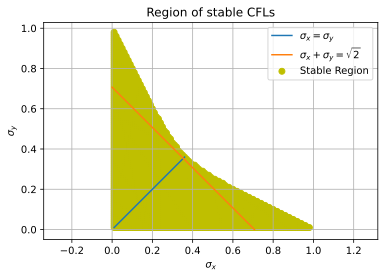

In [62]:
test_stab()